# Fake Product Review Detection Using Machine Learning
# [Paper Link](https://link.springer.com/chapter/10.1007/978-3-031-45124-9_16)

# Created and Developed By: Eng Waleed

#[Data Link](https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset)

###Connect To Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
import os
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import joblib



import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Define Utilities

In [ ]:
def remove_punctuation(text):
    # Remove punctuation
    no_punct = text.translate(str.maketrans('', '', string.punctuation))
    return no_punct

In [ ]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_text = [word.lower() for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [ ]:
def data_cleaning(text):
    text_no_punct = remove_punctuation(text)
    text_no_stopwords = remove_stopwords(text_no_punct)
    return text_no_stopwords

### Load the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Fake review data/fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


### Explore the dataset

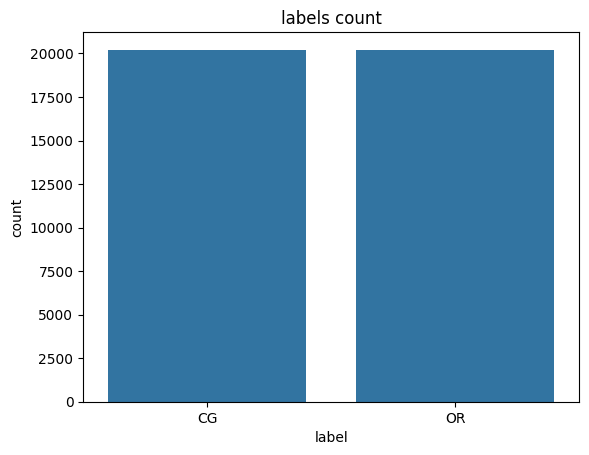

In [ ]:
sns.countplot(df, x='label')
plt.title("labels count")
plt.show()

### Select Relevant Features

In [ ]:
selected_features = ['text_', 'label']
data = df[selected_features]
data.head()

,text_,label
0,"Love this! Well made, sturdy, and very comfor...",CG
1,"love it, a great upgrade from the original. I...",CG
2,This pillow saved my back. I love the look and...,CG
3,"Missing information on how to use it, but it i...",CG
4,Very nice set. Good quality. We have had the s...,CG


###Label Encoding

In [ ]:
label_map = {'OR': 0, 'CG': 1}
data['label'] = data['label'].map(label_map)
data.head()

,text_,label
0,"Love this! Well made, sturdy, and very comfor...",1
1,"love it, a great upgrade from the original. I...",1
2,This pillow saved my back. I love the look and...,1
3,"Missing information on how to use it, but it i...",1
4,Very nice set. Good quality. We have had the s...,1


### Clean Data (Remove Punctuation & Stopwords)

In [ ]:
data['clean_data'] = data['text_'].map(data_cleaning)
data.head()

,text_,label,clean_data
0,"Love this! Well made, sturdy, and very comfor...",1,love well made sturdy comfortable love itvery ...
1,"love it, a great upgrade from the original. I...",1,love great upgrade original ive mine couple years
2,This pillow saved my back. I love the look and...,1,pillow saved back love look feel pillow
3,"Missing information on how to use it, but it i...",1,missing information use great product price
4,Very nice set. Good quality. We have had the s...,1,nice set good quality set two months


### Split Data to features and target

In [ ]:
x = data['clean_data']
y = data['label']

### Convert Text To Vector

In [ ]:
max_len = 5000
vectorizer = CountVectorizer(max_features=max_len)
text_vectors = vectorizer.fit_transform(x)
text_vectors_array = text_vectors.toarray()

print("Text Vectors (Bag of Words):\n", text_vectors_array)

Text Vectors (Bag of Words):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Split Data To Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_vectors_array, y, test_size=0.2
                                                    , random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32345, 5000)
Shape of X_test: (8087, 5000)
Shape of y_train: (32345,)
Shape of y_test: (8087,)


### Standardized the data

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Make Experments Directories

In [ ]:
os.makedirs("/content/drive/MyDrive/experments", exist_ok=True)
os.makedirs("/content/drive/MyDrive/experments/Fake Product Review Detection", exist_ok=True)


### Save Vectorizer Object

In [ ]:
joblib.dump(vectorizer, '/content/drive/MyDrive/experments/Fake Product Review Detection/count_vectorizer.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/count_vectorizer.joblib']

### Save StandardScaler Object

In [ ]:
joblib.dump(sc, '/content/drive/MyDrive/experments/Fake Product Review Detection/standard_scaler.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/standard_scaler.joblib']

## Try Logistic Regression Model

### Train The model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/Logistic_Regression.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/Logistic_Regression.joblib']

### Test The Model & Plot Confusion Matrix

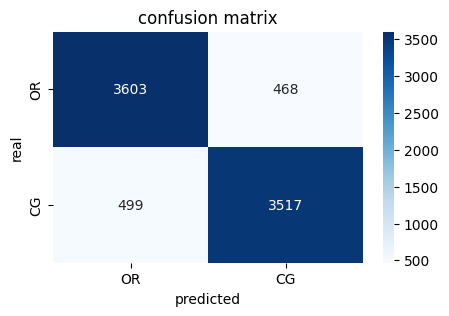

              precision    recall  f1-score   support

          OR     0.8784    0.8850    0.8817      4071
          CG     0.8826    0.8757    0.8791      4016

    accuracy                         0.8804      8087
   macro avg     0.8805    0.8804    0.8804      8087
weighted avg     0.8804    0.8804    0.8804      8087



In [ ]:
y_pred = model.predict(X_test)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


### Try Logistic Regression With Standardization

In [ ]:
model = LogisticRegression()
model.fit(X_train_std, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/Logistic_Regression_std.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/Logistic_Regression_std.joblib']

### Test The Model & Plot Confusion Matrix

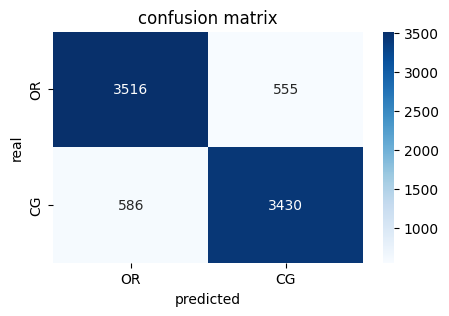

              precision    recall  f1-score   support

          OR     0.8571    0.8637    0.8604      4071
          CG     0.8607    0.8541    0.8574      4016

    accuracy                         0.8589      8087
   macro avg     0.8589    0.8589    0.8589      8087
weighted avg     0.8589    0.8589    0.8589      8087



In [ ]:
y_pred = model.predict(X_test_std)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


## Try k-nearest neighbors Model

### Train The model

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/KNeighbors_Classifier.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/KNeighbors_Classifier.joblib']

### Test The Model & Plot Confusion Matrix

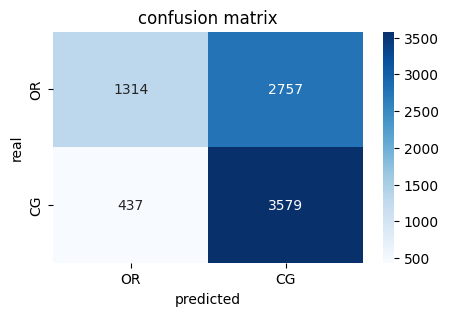

              precision    recall  f1-score   support

          OR     0.7504    0.3228    0.4514      4071
          CG     0.5649    0.8912    0.6915      4016

    accuracy                         0.6050      8087
   macro avg     0.6576    0.6070    0.5714      8087
weighted avg     0.6583    0.6050    0.5706      8087



In [ ]:
y_pred = model.predict(X_test)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


### Try k-nearest neighbors With Standardization

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_std, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/KNeighbors_Classifier_std.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/KNeighbors_Classifier_std.joblib']

### Test The Model & Plot Confusion Matrix

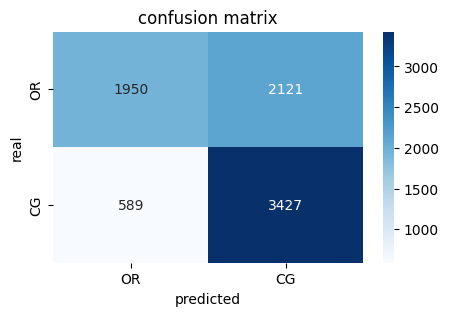

              precision    recall  f1-score   support

          OR     0.7680    0.4790    0.5900      4071
          CG     0.6177    0.8533    0.7166      4016

    accuracy                         0.6649      8087
   macro avg     0.6929    0.6662    0.6533      8087
weighted avg     0.6934    0.6649    0.6529      8087



In [ ]:
y_pred = model.predict(X_test_std)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


## Try SVM Model

### Train The model

In [ ]:
model = SVC()
model.fit(X_train, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/SVM.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/SVM.joblib']

### Test The Model & Plot Confusion Matrix

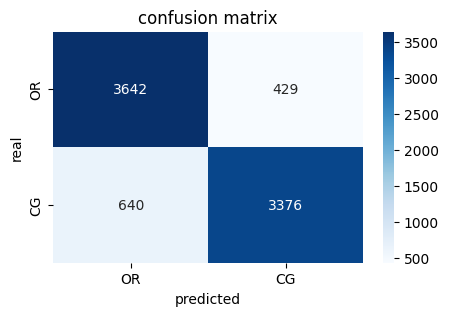

              precision    recall  f1-score   support

          OR     0.8505    0.8946    0.8720      4071
          CG     0.8873    0.8406    0.8633      4016

    accuracy                         0.8678      8087
   macro avg     0.8689    0.8676    0.8677      8087
weighted avg     0.8688    0.8678    0.8677      8087



In [ ]:
y_pred = model.predict(X_test)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


### Try SVM With Standardization

In [ ]:
model = SVC()
model.fit(X_train_std, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/SVM_std.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/SVM_std.joblib']

### Test The Model & Plot Confusion Matrix

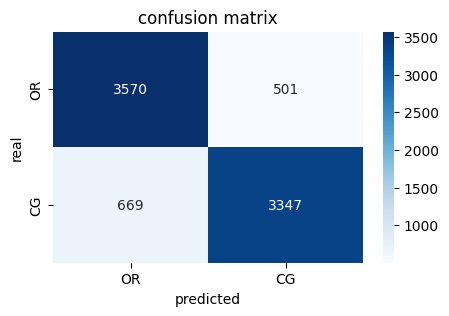

              precision    recall  f1-score   support

          OR     0.8422    0.8769    0.8592      4071
          CG     0.8698    0.8334    0.8512      4016

    accuracy                         0.8553      8087
   macro avg     0.8560    0.8552    0.8552      8087
weighted avg     0.8559    0.8553    0.8552      8087



In [ ]:
y_pred = model.predict(X_test_std)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


## Try Decision Tree Model

### Train The model

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/Decision_Tree.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/Decision_Tree.joblib']

### Test The Model & Plot Confusion Matrix

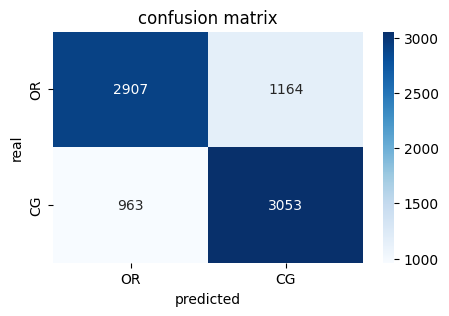

              precision    recall  f1-score   support

          OR     0.7512    0.7141    0.7321      4071
          CG     0.7240    0.7602    0.7416      4016

    accuracy                         0.7370      8087
   macro avg     0.7376    0.7371    0.7369      8087
weighted avg     0.7377    0.7370    0.7369      8087



In [ ]:
y_pred = model.predict(X_test)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


### Try Decision Tree With Standardization

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_std, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/Decision_Tree_std.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/Decision_Tree_std.joblib']

### Test The Model & Plot Confusion Matrix

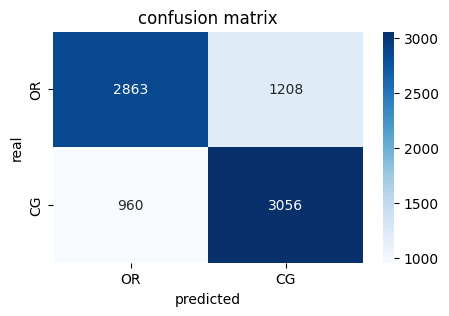

              precision    recall  f1-score   support

          OR     0.7489    0.7033    0.7254      4071
          CG     0.7167    0.7610    0.7382      4016

    accuracy                         0.7319      8087
   macro avg     0.7328    0.7321    0.7318      8087
weighted avg     0.7329    0.7319    0.7317      8087



In [ ]:
y_pred = model.predict(X_test_std)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


## Try Random Forest Model

### Train The model

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/Random_Forest.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/Random_Forest.joblib']

### Test The Model & Plot Confusion Matrix

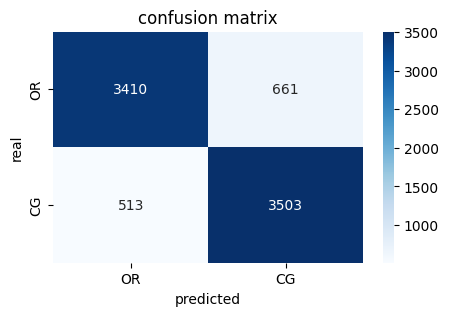

              precision    recall  f1-score   support

          OR     0.8692    0.8376    0.8531      4071
          CG     0.8413    0.8723    0.8565      4016

    accuracy                         0.8548      8087
   macro avg     0.8552    0.8549    0.8548      8087
weighted avg     0.8553    0.8548    0.8548      8087



In [ ]:
y_pred = model.predict(X_test)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


### Try Random Forest With Standardization

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_std, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/Random_Forest_std.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/Random_Forest_std.joblib']

### Test The Model & Plot Confusion Matrix

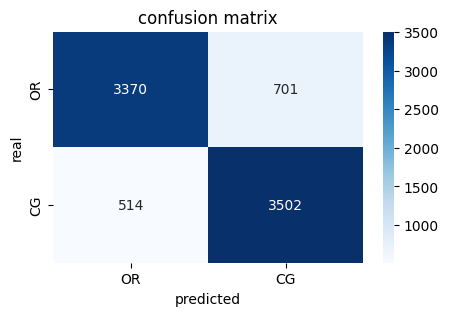

              precision    recall  f1-score   support

          OR     0.8677    0.8278    0.8473      4071
          CG     0.8332    0.8720    0.8522      4016

    accuracy                         0.8498      8087
   macro avg     0.8504    0.8499    0.8497      8087
weighted avg     0.8506    0.8498    0.8497      8087



In [ ]:
y_pred = model.predict(X_test_std)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


## Try Multinomial Naive Bayes Model

### Train The model

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/MultinomialNB.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/MultinomialNB.joblib']

### Test The Model & Plot Confusion Matrix

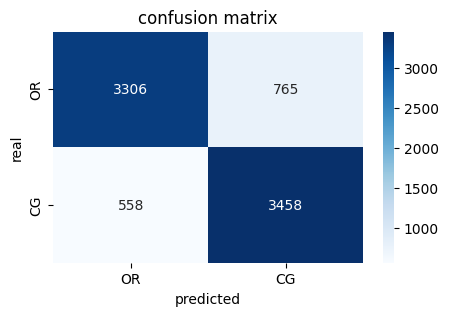

              precision    recall  f1-score   support

          OR     0.8556    0.8121    0.8333      4071
          CG     0.8188    0.8611    0.8394      4016

    accuracy                         0.8364      8087
   macro avg     0.8372    0.8366    0.8363      8087
weighted avg     0.8373    0.8364    0.8363      8087



In [ ]:
y_pred = model.predict(X_test)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


### There isn't Multinomial Naive Bayes With Standardization because Multinomial Naive Bayes dosen't accept negative values

## Try Bernoulli Naive Bayes Model

### Train The model

In [ ]:
model = BernoulliNB()
model.fit(X_train, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/BernoulliNB.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/BernoulliNB.joblib']

### Test The Model & Plot Confusion Matrix

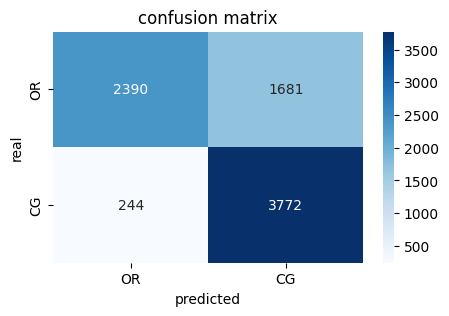

              precision    recall  f1-score   support

          OR     0.9074    0.5871    0.7129      4071
          CG     0.6917    0.9392    0.7967      4016

    accuracy                         0.7620      8087
   macro avg     0.7995    0.7632    0.7548      8087
weighted avg     0.8003    0.7620    0.7545      8087



In [ ]:
y_pred = model.predict(X_test)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))


### Try Bernoulli Naive Bayes With Standardization

In [ ]:
model = BernoulliNB()
model.fit(X_train_std, y_train)
joblib.dump(model, '/content/drive/MyDrive/experments/Fake Product Review Detection/BernoulliNB_std.joblib')

['/content/drive/MyDrive/experments/Fake Product Review Detection/BernoulliNB_std.joblib']

### Test The Model & Plot Confusion Matrix

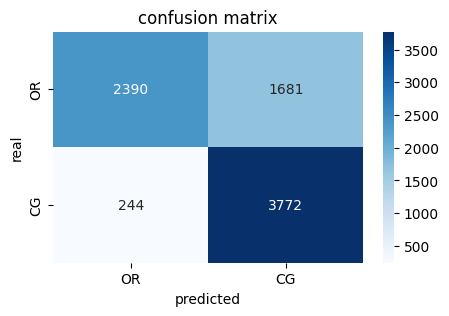

              precision    recall  f1-score   support

          OR     0.9074    0.5871    0.7129      4071
          CG     0.6917    0.9392    0.7967      4016

    accuracy                         0.7620      8087
   macro avg     0.7995    0.7632    0.7548      8087
weighted avg     0.8003    0.7620    0.7545      8087



In [ ]:
y_pred = model.predict(X_test_std)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred, target_names=label_map.keys(), digits=4))
